In [1]:
import pandas as pd

In [7]:
site = "www.netflix.com"

In [3]:
pt_pd = pd.read_csv("./tmp_dict/%s/prolonged_traffic.txt" % site, sep = '\t', header = None)

In [2]:
import requests

In [5]:
get = requests.get("https://ipinfo.io/8.8.8.8/org?token=2c732d429c11a8").content.decode().strip()

In [6]:
pt_pd['org'] = pt_pd.apply(lambda x: requests.get("https://ipinfo.io/%s/org?token=2c732d429c11a8"%x[0]).content.decode().strip(), axis = 1)

In [8]:
pt_pd

,0,1,org
0,3.230.129.93,0,"AS14618 Amazon.com, Inc."
1,104.16.148.64,0,"AS13335 Cloudflare, Inc."
2,45.57.91.1,0,AS40027 Netflix Streaming Services Inc.
3,20.42.73.27,0,AS8075 Microsoft Corporation
4,204.85.30.250,0,AS81 MCNC
5,104.18.41.98,0,"AS13335 Cloudflare, Inc."
6,184.29.129.189,0,"AS16625 Akamai Technologies, Inc."
7,142.250.176.72,0,AS15169 Google LLC
8,54.84.139.19,0,"AS14618 Amazon.com, Inc."
9,172.217.10.98,0,AS15169 Google LLC


In [3]:
import os

In [15]:
os.environ["mmpath"] = "/"

In [4]:
from subprocess import check_output

In [5]:
from collections import defaultdict

In [18]:
output_lst = defaultdict(list)

In [ ]:
for i in [0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]:
    pt_pd[1] = pt_pd.apply(lambda x: i if "AS13335" in x['org'] or "AS81" in x['org'] or "AS16625" in x['org'] else x[1], axis = 1)
    pt_pd[[0,1]].to_csv("./tmp_dict/%s/prolonged_traffic.txt" % site, header = None, index = None, sep = "\t")
    for _ in range(100):
        output_lst[i].append(check_output("python replay_all.py", shell = True))
    os.system("mv plTime/%s plTime/%s.%s" % (site,site,i))

In [8]:
plt_dict = {}
for i in [ 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]:
    plt_dict[i] = pd.read_csv("plTime/%s.%s" % (site,i), header = None, sep = '\t')

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'netflix')

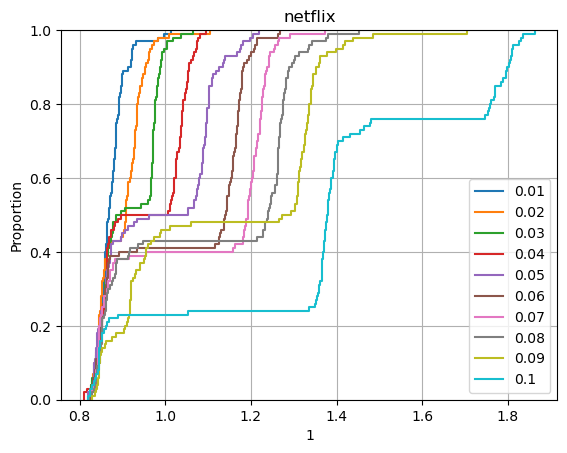

In [11]:
for each in plt_dict:
    sns.ecdfplot(plt_dict[each][plt_dict[each][0] == "PLT"][1], label = each.__str__())
plt.grid()
plt.legend()
plt.title("netflix")

In [52]:
len(output_lst)

11

In [53]:
connect_session_info_pic2 = output_lst

In [54]:
%store connect_session_info_pic2

Stored 'connect_session_info_pic2' (defaultdict)
